Analysing human motion with the mpu6050 sensor to specify walk, stair-walking, squats and the stand-lie down datasets.

Date: 02-01-2024, Author: Linda Hoogerwerf
On behalf of the Research Centre Innovations in Care at the Rotterdam university of applied sciences, project Motion Sensors. 

file:///Users/micha/Downloads/Studentassistenmap/data_analysis_mpu6050_human_motion_v2.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

In [2]:
input_frequency = 36

def clean_data(dataset):
    colnames=['Time', 'Yaw', 'Pitch', 'Roll']
    df = pd.read_csv(dataset, usecols=[1, 2, 3, 4], names=colnames, header=None)
    df = df[df['Yaw'].notna()]
    df.reset_index(drop=True, inplace=True)
    df = df.iloc[72:]
    df.reset_index(drop=True, inplace=True)
    data = 1/input_frequency + 1/input_frequency*np.arange(0,len(df))
    df['Time']= data
    return df

walk_data_1 = clean_data("lopen_test1.csv")
walk_data_2 = clean_data("lopen_test2.csv")
walk_data_3 = clean_data("lopen_test3.csv")

stand_liedown_data_1 = clean_data("liggen_test1.csv")
stand_liedown_data_2 = clean_data("liggen_test2.csv")
stand_liedown_data_3 = clean_data("liggen_test3.csv")

stair_up_down_data_1 = clean_data("trapA_test1.csv")
stair_up_down_data_2 = clean_data("trapA_test2.csv")
stair_up_down_data_3 = clean_data("trapA_test3.csv")

stair_up_data_1 = clean_data("trapB_test1.csv")
stair_up_data_2 = clean_data("trapB_test2.csv")
stair_up_data_3 = clean_data("trapB_test3.csv")

stair_down_data_1 = clean_data("trapC_test1.csv")
stair_down_data_1 = clean_data("trapC_test1.csv")
stair_down_data_1 = clean_data("trapC_test1.csv")



squat_data_2 = clean_data("hurk_test2.csv")
squat_data_3 = clean_data("hurk_test3.csv")

squat_data_3

,Time,Yaw,Pitch,Roll
0,0.027778,25.93,-25.52,-79.45
1,0.055556,25.61,-26.89,-78.04
2,0.083333,25.33,-28.56,-76.91
3,0.111111,25.38,-29.83,-76.21
4,0.138889,26.03,-30.30,-76.92
...,...,...,...,...
2934,81.527778,41.94,35.38,-75.28
2935,81.555556,41.32,35.65,-76.03
2936,81.583333,40.62,35.00,-76.89
2937,81.611111,39.83,33.76,-77.90


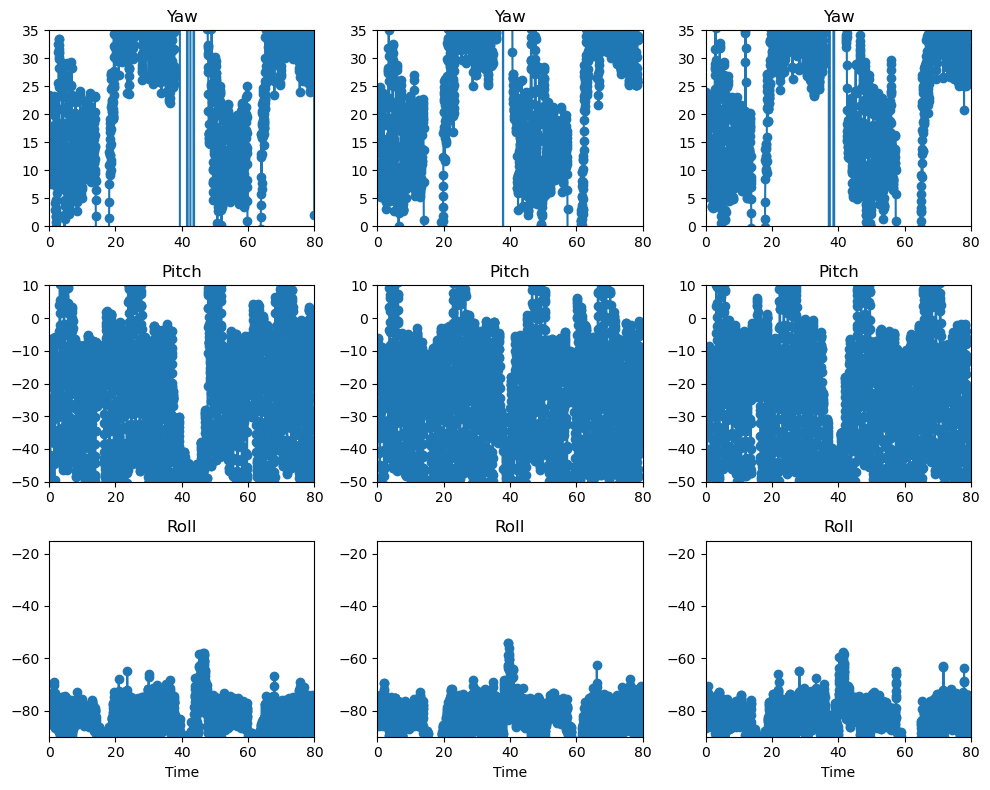

In [3]:
def initial_graph(df_1, df_2, df_3):
    list_of_datasets = [df_1, df_2, df_3]
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize= (10, 8))
    col = 0
    for df in list_of_datasets:

        ax[0, col].plot(df["Time"], df["Yaw"], marker='o')
        ax[0, col].set_title('Yaw')
        ax[0, col].set_xlim(0,80)
        ax[0, col].set_ylim(0,35)

        ax[1, col].plot(df["Time"], df["Pitch"], marker='o')
        ax[1, col].set_title('Pitch')
        ax[1, col].set_xlim(0,80)
        ax[1, col].set_ylim(-50,10)

        ax[2, col].plot(df["Time"], df["Roll"], marker='o')
        ax[2, col].set_title('Roll')
        ax[2, col].set_xlabel('Time')
        ax[2, col].set_xlim(0,80)
        ax[2, col].set_ylim(-90,-15)
        col += 1
    
    plt.tight_layout()
    plt.show() 

initial_graph(stair_up_down_data_1, stair_up_down_data_2,  stair_up_down_data_3)

DOE NOT WORK

def graph_fourier(list_of_frequencies, list_of_fft_psd): 
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    count = 0

    while count < len(list_of_frequencies):
        i = list_of_frequencies[count][0] > 0   #-> boolean

        ax[0, count].plot(list_of_frequencies[count][0][i], list_of_fft_psd[count][0][i] ) 
        ax[0, count].set_xlim(0, 20)
        ax[0, count].set_title('Yaw')    
        ax[0, count].set_xlabel('Frequency (36Hz)')
        ax[0, count].set_ylabel('PSD (dB)')

        ax[1, count].plot(list_of_frequencies[count][1][i], list_of_fft_psd[count][1][i]) 
        ax[1, count].set_xlim(0, 20)
        ax[1, count].set_title('Pitch')                      
        ax[1, count].set_xlabel('Frequency (36Hz)')
        ax[1, count].set_ylabel('PSD (dB)')

        ax[2, count].plot(list_of_frequencies[count][2][i], list_of_fft_psd[count][2][i])
        ax[2, count].set_xlim(0, 20)
        ax[2, count].set_title('Roll')    
        ax[2, count].set_xlabel('Frequency (36Hz)')
        ax[2, count].set_ylabel('PSD (dB)')
        count += 1
    plt.savefig('fourier.pdf')
    plt.tight_layout()
    plt.show() 
    
def fourier_data(df_1, df_2, df_3):
    list_of_datasets = [df_1, df_2, df_3]
    w, h = 3, 3
    list_of_frequencies = [[0 for x in range(w)] for y in range(h)]
    list_of_fft_psd = [[0 for x in range(w)] for y in range(h)]
    sampling_rate = 36
    x = 0
    for df in list_of_datasets:       
        data_yaw = np.array(df['Yaw'])
        df_yaw_fft = fft(data_yaw)                              #fft_values = np.fft.fft(data)
        df_yaw_psd = np.abs(df_yaw_fft) ** 2                    #fft_magnitude = np.abs(fft_values)
        fftfreq0 = fftfreq(len(data_yaw), (1/sampling_rate))    #frequency = fftfreq(n, d = 1/sampling_rate), n=len(data)

        data_pitch = np.array(df['Pitch'])
        df_pitch_fft = fft(data_pitch)
        df_pitch_psd = np.abs(df_pitch_fft) ** 2
        fftfreq1 = fftfreq(len(data_pitch), (1/sampling_rate))

        data_roll = np.array(df['Roll'])
        df_roll_fft = fft(data_roll)
        df_roll_psd = np.abs(df_roll_fft) ** 2
        fftfreq2 = fftfreq(len(data_roll), (1/sampling_rate))
        
        list_of_frequencies[x]=[fftfreq0, fftfreq1, fftfreq2]
        list_of_fft_psd[x] = [df_yaw_psd, df_pitch_psd, df_roll_psd]
        x +=1
    return list_of_frequencies, list_of_fft_psd
   
list_of_frequencies, list_of_fft_psd = fourier_data(stair_up_down_data_1, stair_up_down_data_2,  stair_up_down_data_3)
graph_fourier(list_of_frequencies, list_of_fft_psd)

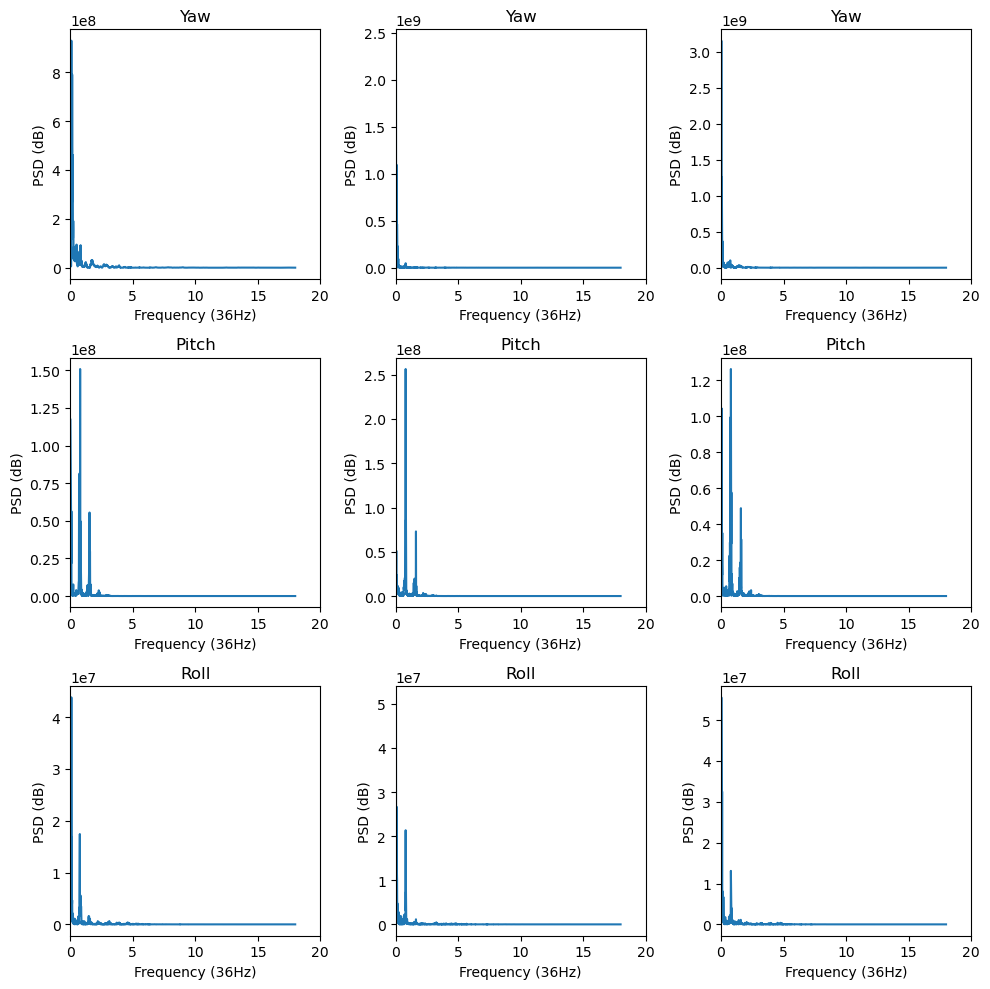

In [4]:
def graph_fourier(list_of_frequencies, list_of_fft_psd): 
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    count = 0

    while count < len(list_of_frequencies):
        i = list_of_frequencies[count][0] > 0   #-> boolean

        ax[0, count].plot(list_of_frequencies[count][0][i], list_of_fft_psd[count][0][i] ) 
        ax[0, count].set_xlim(0, 20)
        ax[0, count].set_title('Yaw')    
        ax[0, count].set_xlabel('Frequency (36Hz)')
        ax[0, count].set_ylabel('PSD (dB)')

        ax[1, count].plot(list_of_frequencies[count][1][i], list_of_fft_psd[count][1][i]) 
        ax[1, count].set_xlim(0, 20)
        ax[1, count].set_title('Pitch')                      
        ax[1, count].set_xlabel('Frequency (36Hz)')
        ax[1, count].set_ylabel('PSD (dB)')

        ax[2, count].plot(list_of_frequencies[count][2][i], list_of_fft_psd[count][2][i])
        ax[2, count].set_xlim(0, 20)
        ax[2, count].set_title('Roll')    
        ax[2, count].set_xlabel('Frequency (36Hz)')
        ax[2, count].set_ylabel('PSD (dB)')
        count += 1
    plt.savefig('fourier.pdf')
    plt.tight_layout()
    plt.show() 
    
### FIX door chatgpt ===> ValueError: could not convert string to float: ' '
def fourier_data(df_1, df_2, df_3):
    list_of_datasets = [df_1, df_2, df_3]
    w, h = 3, 3
    list_of_frequencies = [[0 for x in range(w)] for y in range(h)]
    list_of_fft_psd = [[0 for x in range(w)] for y in range(h)]
    sampling_rate = 36
    x = 0
    for df in list_of_datasets:       
        # Clean data: Remove non-numeric values and convert to float
        df['Yaw'] = pd.to_numeric(df['Yaw'], errors='coerce')
        df['Pitch'] = pd.to_numeric(df['Pitch'], errors='coerce')
        df['Roll'] = pd.to_numeric(df['Roll'], errors='coerce')

        # Drop rows with NaN values
        df.dropna(inplace=True)

        data_yaw = np.array(df['Yaw'])
        df_yaw_fft = fft(data_yaw)
        df_yaw_psd = np.abs(df_yaw_fft) ** 2
        fftfreq0 = fftfreq(len(data_yaw), (1/sampling_rate))

        data_pitch = np.array(df['Pitch'])
        df_pitch_fft = fft(data_pitch)
        df_pitch_psd = np.abs(df_pitch_fft) ** 2
        fftfreq1 = fftfreq(len(data_pitch), (1/sampling_rate))

        data_roll = np.array(df['Roll'])
        df_roll_fft = fft(data_roll)
        df_roll_psd = np.abs(df_roll_fft) ** 2
        fftfreq2 = fftfreq(len(data_roll), (1/sampling_rate))
        
        list_of_frequencies[x] = [fftfreq0, fftfreq1, fftfreq2]
        list_of_fft_psd[x] = [df_yaw_psd, df_pitch_psd, df_roll_psd]
        x += 1
    return list_of_frequencies, list_of_fft_psd

list_of_frequencies, list_of_fft_psd = fourier_data(stair_up_down_data_1, stair_up_down_data_2,  stair_up_down_data_3)
graph_fourier(list_of_frequencies, list_of_fft_psd)


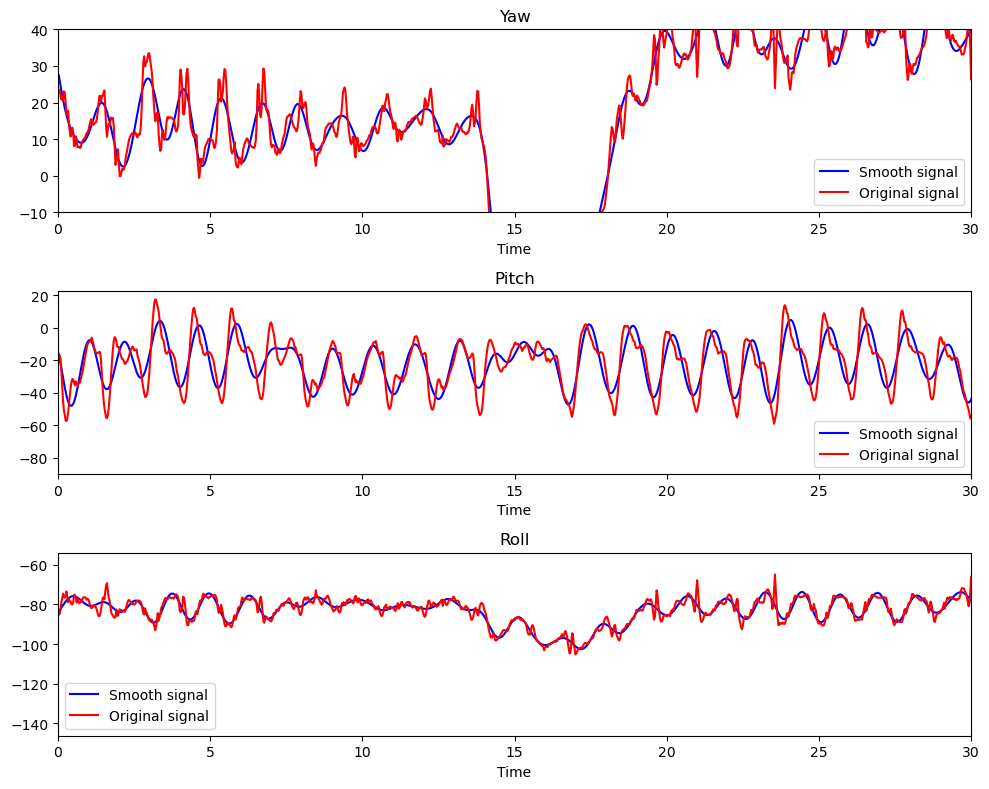

In [5]:
# Not yet adjusted to multiple datasets. Code not functional now.
sampling_rate = 36
df = stair_up_down_data_1
data_yaw = np.array(df['Yaw'])
df_yaw_fft = fft(data_yaw)
fftfreq0 = fftfreq(len(data_yaw), (1/sampling_rate))
df_yaw_fft_bis = df_yaw_fft.copy()
df_yaw_fft_bis[np.abs(fftfreq0) > 1.1] = 0
df_yaw_slow = np.real(ifft(df_yaw_fft_bis))

data_pitch = np.array(df['Pitch'])
df_pitch_fft = fft(data_pitch)
fftfreq1 = fftfreq(len(data_pitch), (1/sampling_rate))
df_pitch_fft_bis = df_pitch_fft.copy()
df_pitch_fft_bis[np.abs(fftfreq1) > 1.1] = 0
df_pitch_slow = np.real(ifft(df_pitch_fft_bis))

data_roll = np.array(df['Roll'])
df_roll_fft = fft(data_roll)
fftfreq2 = fftfreq(len(data_roll), (1/sampling_rate))
df_roll_fft_bis = df_roll_fft.copy()
df_roll_fft_bis[np.abs(fftfreq2) > 1.1] = 0
df_roll_slow = np.real(ifft(df_roll_fft_bis))

fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(df["Time"], df_yaw_slow, color='blue', label='Smooth signal')
ax[0].plot(df["Time"], df["Yaw"], color='red', label='Original signal')
ax[0].legend()
ax[0].set_title('Yaw')
ax[0].set_xlim(0,30)
ax[0].set_ylim(-10, 40)
ax[0].set_xlabel('Time')

ax[1].plot(df["Time"], df_pitch_slow, color='blue', label='Smooth signal')
ax[1].plot(df["Time"], df["Pitch"], color='red', label='Original signal')
ax[1].legend()
ax[1].set_xlim(0,30)
ax[1].set_title('Pitch')
ax[1].set_xlabel('Time')

ax[2].plot(df["Time"], df_roll_slow, color='blue', label='Smooth signal')
ax[2].plot(df["Time"], df["Roll"], color='red', label='Original signal')
ax[2].legend()
ax[2].set_xlim(0,30)
ax[2].set_title('Roll')
ax[2].set_xlabel('Time')

plt.tight_layout()
plt.show() 

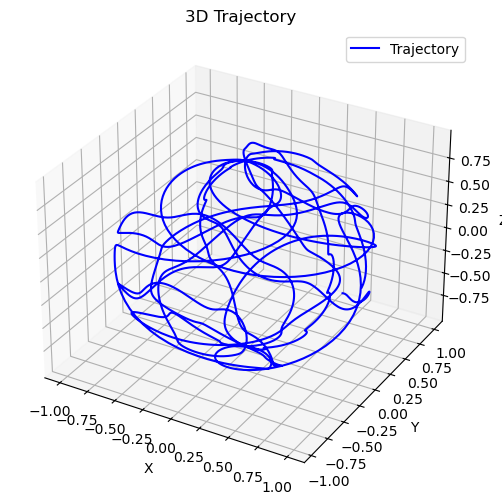

In [6]:
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np

# Sample data
time = df["Time"]  # Assuming you have time data
yaw = df_yaw_slow
pitch = df_pitch_slow
roll = df_roll_slow

# Integration to obtain orientation angles
orientation_yaw = np.cumsum(yaw) * (time[1] - time[0])
orientation_pitch = np.cumsum(pitch) * (time[1] - time[0])
orientation_roll = np.cumsum(roll) * (time[1] - time[0])

# Convert angles to rotation matrices
rotation = Rotation.from_euler('ZYX', np.column_stack((orientation_yaw, orientation_pitch, orientation_roll)), degrees=True)

# Apply rotation to a reference vector
reference_vector = np.array([1, 0, 0])  # Initial reference vector
trajectory = rotation.apply(reference_vector)

# Plot 3D trajectory
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')
ax.legend()

plt.show()


### COLOR CODING 3D trajectory as function of Time

/var/folders/hw/m1_dbnw147qf2d3n2tzcnx3h0000gn/T/ipykernel_20531/2532775522.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm')


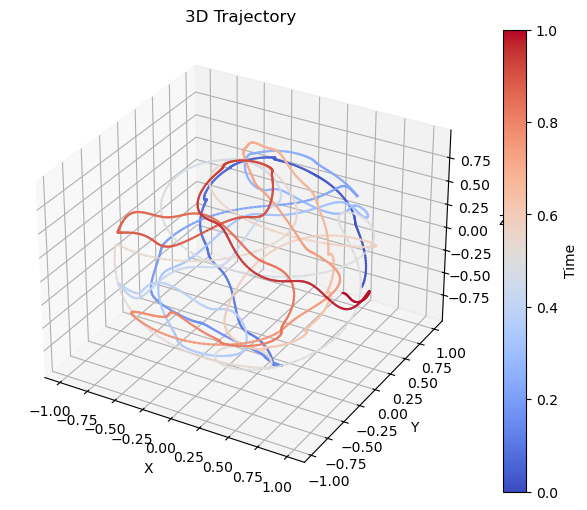

In [7]:
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Sample data
time = df["Time"]  # Assuming you have time data
yaw = df_yaw_slow
pitch = df_pitch_slow
roll = df_roll_slow

# Integration to obtain orientation angles
orientation_yaw = np.cumsum(yaw) * (time[1] - time[0])
orientation_pitch = np.cumsum(pitch) * (time[1] - time[0])
orientation_roll = np.cumsum(roll) * (time[1] - time[0])

# Convert angles to rotation matrices
rotation = Rotation.from_euler('ZYX', np.column_stack((orientation_yaw, orientation_pitch, orientation_roll)), degrees=True)

# Apply rotation to a reference vector
reference_vector = np.array([1, 0, 0])  # Initial reference vector
trajectory = rotation.apply(reference_vector)

# Plot 3D trajectory with changing colors based on time
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

min_length = trajectory.shape[0]
time_values = np.linspace(0, 1, min_length)  # Generate time values

# Create a colormap that goes from dark red to dark blue
color_map = cm.get_cmap('coolwarm')

# Plot the trajectory with colors based on time
for i in range(min_length - 1):
    ax.plot(trajectory[i:i+2, 0], trajectory[i:i+2, 1], trajectory[i:i+2, 2],
            color=color_map(time_values[i]), alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory')

# Add a color bar to show the mapping of time to color
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Time')  # Provide ax=ax argument to assign colorbar to the subplot

plt.show()


### CHANGE in chartesian/Euclian coordinates? 3D POSTION in relation to 3D orientation data: roll, pitch and yaw

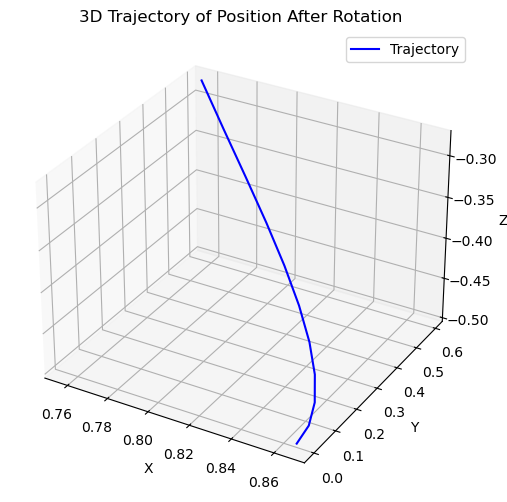

In [8]:
from scipy.spatial.transform import Rotation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
time = np.linspace(0, 10, 100)  # Time points
yaw = 45 * np.sin(time)  # Yaw angle in degrees (example: sinusoidal motion)
pitch = 30 * np.cos(time)  # Pitch angle in degrees (example: cosine motion)
roll = 15 * np.sin(time)  # Roll angle in degrees (example: sinusoidal motion)

# Initialize an empty list to store positions after rotation
positions_after_rotation = []

# Convert angles to rotation matrices and compute position after rotation for each time point
for t in time:
    rotation = Rotation.from_euler('ZYX', [yaw[int(t)], pitch[int(t)], roll[int(t)]], degrees=True)
    reference_vector = np.array([1, 0, 0])  # Initial reference vector
    position_after_rotation = rotation.apply(reference_vector)
    positions_after_rotation.append(position_after_rotation)

# Convert the list of positions to a numpy array for easier manipulation
positions_after_rotation = np.array(positions_after_rotation)

# Plot 3D trajectory of the position after rotation as a function of time
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory
ax.plot(positions_after_rotation[:, 0], positions_after_rotation[:, 1], positions_after_rotation[:, 2], color='blue', label='Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectory of Position After Rotation')
ax.legend()

plt.show()


To plot changes in velocity and acceleration/deceleration as a function of time, you can calculate the velocity and acceleration vectors from the trajectory data and then plot them against time. Here's how you can modify your code to achieve that:

/var/folders/hw/m1_dbnw147qf2d3n2tzcnx3h0000gn/T/ipykernel_20531/1319336315.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('coolwarm')


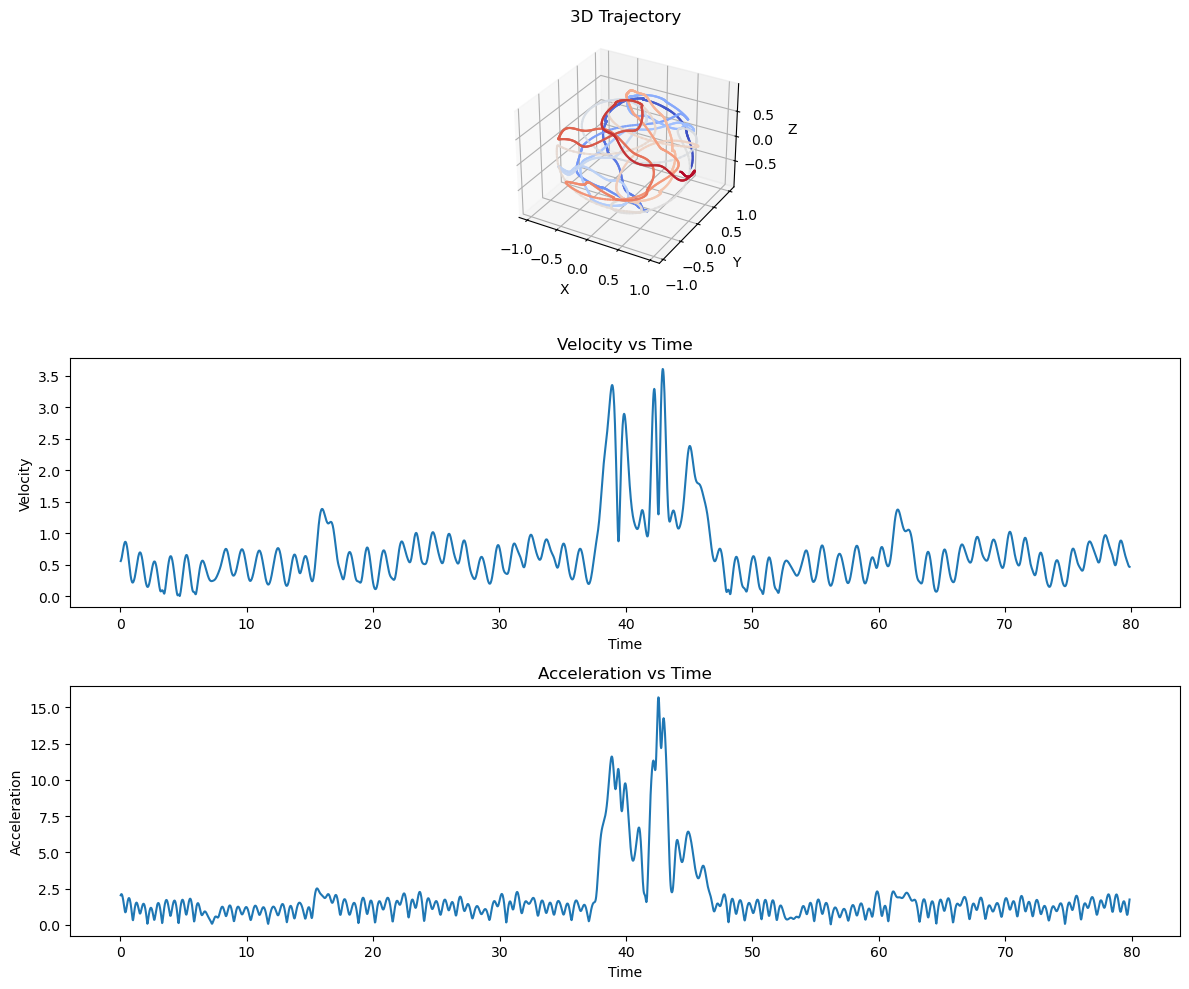

In [9]:
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Sample data
time = df["Time"]  # Assuming you have time data
yaw = df_yaw_slow
pitch = df_pitch_slow
roll = df_roll_slow

# Integration to obtain orientation angles
orientation_yaw = np.cumsum(yaw) * (time[1] - time[0])
orientation_pitch = np.cumsum(pitch) * (time[1] - time[0])
orientation_roll = np.cumsum(roll) * (time[1] - time[0])

# Convert angles to rotation matrices
rotation = Rotation.from_euler('ZYX', np.column_stack((orientation_yaw, orientation_pitch, orientation_roll)), degrees=True)

# Apply rotation to a reference vector
reference_vector = np.array([1, 0, 0])  # Initial reference vector
trajectory = rotation.apply(reference_vector)

# Calculate velocity and acceleration
velocity = np.diff(trajectory, axis=0) / (time[1] - time[0])
acceleration = np.diff(velocity, axis=0) / (time[1] - time[0])

# Plot 3D trajectory with changing colors based on time
fig = plt.figure(figsize=(12, 10))

# Plot trajectory
ax1 = fig.add_subplot(311, projection='3d')
min_length = trajectory.shape[0]
time_values = np.linspace(0, 1, min_length)  # Generate time values
color_map = cm.get_cmap('coolwarm')
for i in range(min_length - 1):
    ax1.plot(trajectory[i:i+2, 0], trajectory[i:i+2, 1], trajectory[i:i+2, 2],
             color=color_map(time_values[i]), alpha=0.8)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Trajectory')

# Plot velocity
ax2 = fig.add_subplot(312)
ax2.plot(time[:-1], np.linalg.norm(velocity, axis=1))
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.set_title('Velocity vs Time')

# Plot acceleration
ax3 = fig.add_subplot(313)
ax3.plot(time[:-2], np.linalg.norm(acceleration, axis=1))
ax3.set_xlabel('Time')
ax3.set_ylabel('Acceleration')
ax3.set_title('Acceleration vs Time')

plt.tight_layout()
plt.show()
